In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from flaml import AutoML

# Set random seed for reproducibility
np.random.seed(42)

#metrics
from sklearn import metrics
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import learning_curve

 <h3><b>Reading Train and Test datasets</b></h3>

In [246]:
train = pd.read_csv("Dataset/train_v9rqX0R.csv")
test = pd.read_csv("Dataset/test_AbJTz2l.csv")

<h3><b>Reading the prepared datasets after performing EDA and data preparation</b></h3>

In [247]:
train_prepared = pd.read_csv("train_encoded.csv")
test_prepared= pd.read_csv("test_encoded.csv")

In [248]:
train_prepared.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [249]:
test_prepared.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,2,1,1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,2,2,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,2,1,1
4,FDY38,13.600,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,3


<h3><b>Feature Selection</b></h3>

In [250]:
X = train_prepared.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
Y = train_prepared['Item_Outlet_Sales']

# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (8523, 8)
Shape of Y: (8523,)


In [251]:
X_test = test_prepared.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier',])

<h3><b>Split the dataset into a train and validation set</b></h3>

In [252]:
# Split the dataset into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the train and validation sets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6818, 8) (1705, 8) (6818,) (1705,)


<h3><b>Setting up AutoML hyperparameters</b></h3>

In [253]:
# Split the dataset into training and testing subsets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an AutoML object
automl = AutoML()

# Specify the search space for FLAML
settings = {
    "time_budget":300,  # Maximum time in seconds for FLAML to search for the best model
    "metric": 'mae',  # Metric to optimize (e.g., accuracy, roc_auc, log_loss)
    "task": 'regression',  # Type of task (classification or regression)
    #"estimator_list":['lgbm', 'xgboost', 'rf', 'catboost', 'extra_tree'], # A list of machine learning models to consider during the search
    "split_type": 'auto', #The type of data splitting strategy to use during training
    "n_jobs": -1, #Number of parallel jobs to run
    "eval_method": 'cv', #The method used to evaluate the performance of models during the search.
}

In [254]:
# Fit the AutoML model using the training data
# Search for the best machine learning model and hyperparameters
automl.fit(X_train=X_train, y_train=y_train, **settings)

# Make predictions on the validation set
Y_pred = automl.predict(X_val)

# Evaluate the performance of the AutoML model on the validation set using MAE
mae =  mean_absolute_error(y_val, Y_pred)
print("MAE on validation set:", mae)

[flaml.automl.logger: 06-25 22:27:54] {1693} INFO - task = regression
[flaml.automl.logger: 06-25 22:27:54] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 06-25 22:27:54] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-25 22:27:54] {1801} INFO - Minimizing error metric: mae
[flaml.automl.logger: 06-25 22:27:54] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 06-25 22:27:54] {2221} INFO - iteration 0, current learner lgbm


[flaml.automl.logger: 06-25 22:27:54] {2347} INFO - Estimated sufficient time budget=4459s. Estimated necessary time budget=38s.
[flaml.automl.logger: 06-25 22:27:54] {2394} INFO -  at 0.6s,	estimator lgbm's best error=1152.1966,	best estimator lgbm's best error=1152.1966
[flaml.automl.logger: 06-25 22:27:54] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-25 22:27:55] {2394} INFO -  at 1.0s,	estimator lgbm's best error=1152.1966,	best estimator lgbm's best error=1152.1966
[flaml.automl.logger: 06-25 22:27:55] {2221} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 06-25 22:27:55] {2394} INFO -  at 1.3s,	estimator lgbm's best error=947.6629,	best estimator lgbm's best error=947.6629
[flaml.automl.logger: 06-25 22:27:55] {2221} INFO - iteration 3, current learner lgbm
[flaml.automl.logger: 06-25 22:27:55] {2394} INFO -  at 1.8s,	estimator lgbm's best error=791.2987,	best estimator lgbm's best error=791.2987
[flaml.automl.logger: 06-25 22:27:55] {22

In [255]:
# Access the best model configuration
best_config = automl.best_config

# Print the best model configuration
print("Best Model Configuration:")
print(best_config)

Best Model Configuration:
{'n_estimators': 17, 'max_depth': 5, 'min_child_weight': 3.553210772653719, 'learning_rate': 0.15797894401609683, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.9013070887791416, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.06857078439046864}


<h3><b>Analysing the model performance</b><h3>

In [256]:
# Make predictions using the AutoML model
predictions = automl.predict(X_val)

# Calculate the area under the ROC curve (AUC)
mae = mean_absolute_error(y_val, predictions)

print("MAE", mae)

MAE 715.5042900948032


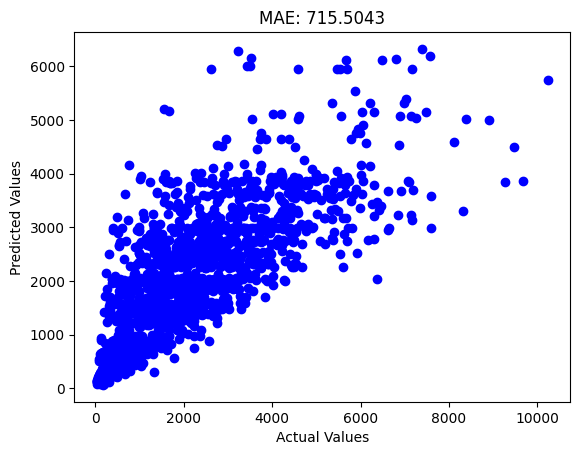

In [257]:
# Plotting MAE
plt.plot(y_val, predictions, 'bo')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MAE: {:.4f}'.format(mae))
plt.show()

<h3><b>Applying the best config on the test dataset</b></h3>

In [258]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0,0.007565,107.8622,1999,1,0,1
1,8.300,1,0.038428,87.3198,2007,2,1,1
2,14.600,0,0.099575,241.7538,1998,2,2,0
3,7.315,0,0.015388,155.0340,2007,2,1,1
4,13.600,1,0.118599,234.2300,1985,1,2,3


In [259]:
pred = automl.predict(X_test)
pred

array([1537.3921, 1326.3163,  557.1662, ..., 1845.2148, 3403.9465,
       1256.0588], dtype=float32)

<h3><b>Generating output csv file for submission</b></h3>

In [260]:
output = pd.DataFrame({'Item_Identifier':test.Item_Identifier, 'Outlet_Identifier':test.Outlet_Identifier, 'Item_Outlet_Sales':pred})
output.to_csv('Big_Mart_Sales_FLAML.csv',index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
